# DA5401 - Assignment 5  
## Visualizing Data Veracity Challenges in Multi-Label Classification  

**Name:** BASAVARAJ A NADUVINAMANI  
**Roll No:** DA25C005  
**Course:** DA5401  



# Importing Necessary Libraries

This notebook uses a range of scientific Python libraries for data analysis, visualization, and machine learning. The main libraries are:

- **NumPy** and **Pandas** for data manipulation
- **Matplotlib** and **Seaborn** for advanced plotting
- **SciPy** for ARFF file loading
- **scikit-learn** for preprocessing and manifold learning (t-SNE, Isomap)

All visualizations are designed to be clear, colorblind-friendly, and publication-quality.

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# SciPy for loading ARFF files
from scipy.io import arff

from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE, Isomap

sns.set_style("whitegrid")


# Part A: Preprocessing and Initial Setup

In this section, we will:
- Load and inspect the Yeast dataset
- Separate features and labels
- Check for missing values and data types
- Create a simplified color label for visualization
- Scale the features for fair distance-based analysis

> **Why is this important?**
>
> Real-world biological data is often high-dimensional and messy. Careful preprocessing ensures that downstream analyses (like t-SNE and Isomap) are meaningful and interpretable.

In this section, we will load, inspect, and prepare the Yeast dataset. This involves loading the feature matrix (X) and the label matrix (Y), checking their dimensions, creating a simplified coloring scheme for visualization, and scaling the features, which is a critical step for distance-based algorithms.

## 1. Data Loading

In [69]:
from scipy.io import arff
import pandas as pd

# Your file path
file_path = r"C:\Users\Viraj\Downloads\yeast\yeast.arff"

# Load the ARFF file
data, meta = arff.loadarff(file_path)

# Convert to pandas DataFrame
df = pd.DataFrame(data)

# Display first few rows
print(df.head())


       Att1      Att2      Att3      Att4      Att5      Att6      Att7  \
0  0.004168 -0.170975 -0.156748 -0.142151  0.058781  0.026851  0.197719   
1 -0.103956  0.011879 -0.098986 -0.054501 -0.007970  0.049113 -0.030580   
2  0.509949  0.401709  0.293799  0.087714  0.011686 -0.006411 -0.006255   
3  0.119092  0.004412 -0.002262  0.072254  0.044512 -0.051467  0.074686   
4  0.042037  0.007054 -0.069483  0.081015 -0.048207  0.089446 -0.004947   

       Att8      Att9     Att10  ...  Class5  Class6  Class7  Class8  Class9  \
0  0.041850  0.066938 -0.056617  ...    b'0'    b'0'    b'1'    b'1'    b'0'   
1 -0.077933 -0.080529 -0.016267  ...    b'0'    b'0'    b'0'    b'0'    b'0'   
2  0.013646 -0.040666 -0.024447  ...    b'0'    b'0'    b'0'    b'0'    b'0'   
3 -0.007670  0.079438  0.062184  ...    b'0'    b'0'    b'0'    b'0'    b'0'   
4  0.064456 -0.133387  0.068878  ...    b'1'    b'1'    b'0'    b'0'    b'0'   

   Class10  Class11  Class12  Class13  Class14  
0     b'0'     b'0'

Here, we load the `yeast.arff` dataset. The `loadarff` function returns the data and metadata. We then convert the data into a pandas DataFrame to easily separate the features from the labels. The first 103 columns are the gene expression features (X), and the last 14 are the multi-label functional categories (Y).  We also ensure the data types are correct (float for features, int for labels).

> **Note:** ARFF files are common in bioinformatics and multi-label research, but require careful conversion to ensure all data is numeric and usable for machine learning.

In [70]:
df.info

<bound method DataFrame.info of           Att1      Att2      Att3      Att4      Att5      Att6      Att7  \
0     0.004168 -0.170975 -0.156748 -0.142151  0.058781  0.026851  0.197719   
1    -0.103956  0.011879 -0.098986 -0.054501 -0.007970  0.049113 -0.030580   
2     0.509949  0.401709  0.293799  0.087714  0.011686 -0.006411 -0.006255   
3     0.119092  0.004412 -0.002262  0.072254  0.044512 -0.051467  0.074686   
4     0.042037  0.007054 -0.069483  0.081015 -0.048207  0.089446 -0.004947   
...        ...       ...       ...       ...       ...       ...       ...   
2412 -0.119784  0.001259 -0.123645 -0.015513 -0.059683  0.091032 -0.043302   
2413  0.085327  0.058590  0.085268 -0.020897  0.068972  0.030125  0.078056   
2414  0.082526 -0.095571 -0.022019 -0.046793 -0.038360  0.041084  0.056509   
2415 -0.130830  0.008868 -0.009457 -0.058930 -0.041224  0.042269  0.117717   
2416 -0.171578 -0.066536  0.168206  0.246831  0.079555  0.016528 -0.088908   

          Att8      Att9     At

In [71]:
feature_cols = df.columns[:103]
label_cols = df.columns[103:]

In [72]:
X = df[feature_cols].values.astype(float)
Y = df[label_cols].apply(pd.to_numeric).astype(int).values

### Null Check

Before any analysis, it is essential to check for missing or null values. Missing data can cause errors in downstream algorithms and may indicate issues with data collection or preprocessing.

As a crucial data quality check, we will inspect the matrices for any null or missing values. This ensures our algorithms will run without errors and that our analysis is based on a complete dataset.

In [73]:
# Check for any null or missing values in our matrices
print(f"Missing values in feature matrix X: {np.isnan(X).sum()}")
print(f"Missing values in target matrix Y: {np.isnan(Y).sum()}")

Missing values in feature matrix X: 0
Missing values in target matrix Y: 0


The dataset is clean, with no missing values in either the feature matrix or the label matrix. This ensures that all subsequent analyses are based on a complete dataset.

## 2. Dimensionality Check

This step confirms the dimensions of our dataset. We report:
- The number of data points (experiments)
- The initial number of features (gene expression levels)
- The number of labels (functional categories)

Understanding the shape of the data is crucial for designing appropriate machine learning and visualization strategies.

In [74]:
print(f"Shape of feature matrix X: {X.shape}")
print(f"Shape of target matrix Y: {Y.shape}")
print(f"\nInitial number of features: {X.shape[1]}")
print(f"Number of data points (experiments): {X.shape[0]}")

Shape of feature matrix X: (2417, 103)
Shape of target matrix Y: (2417, 14)

Initial number of features: 103
Number of data points (experiments): 2417


The output confirms the structure of the Yeast dataset:

- **Data Points:** 2,417 individual gene expression experiments.
- **Features:** 103 gene expression levels per experiment (high-dimensional space).
- **Labels:** 14 possible binary functional categories per gene (multi-label problem).

> **Why does this matter?**
>
> High-dimensional, multi-label data is challenging for both visualization and classification. Dimensionality reduction is essential for insight.

## 3. Label Selection for Visualization

The Yeast dataset has 14 binary labels, making it a multi-label classification problem. Visualizing all 14 labels simultaneously on a 2D plot would be chaotic and difficult to interpret. 

**Objective:**
- Create a new, single categorical variable with just four distinct groups for visualization.
- The original plan: select the two most frequent single-label classes and the most frequent multi-label combination.
- All other combinations are grouped as "Other".

> **Why simplify?**
>
> Too many colors or categories in a plot can obscure patterns and make interpretation difficult. Grouping helps focus on the most informative structures.

In [75]:
# Find all unique class combinations that are single-label (sum == 1)
y_tuples = [tuple(row) for row in Y]
unique_labels = set(y_tuples)
unique_single_label_classes = [lbl for lbl in unique_labels if sum(lbl) == 1]
print("Unique single-label classes:", unique_single_label_classes)

Unique single-label classes: [(np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0))]


In [76]:
import numpy as np

# Safely handle structured or tuple-like labels
unique_single_label_classes = []
for lbl in unique_labels:
    # Convert to numeric iterable if needed
    try:
        values = np.array(lbl, dtype=float)
        if np.sum(values) == 1:
            unique_single_label_classes.append(lbl)
    except Exception:
        # Skip entries that can't be summed
        continue

print("Unique single-label classes:", unique_single_label_classes)


Unique single-label classes: [(np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0))]


In [77]:
# Find all unique multi-label classes (where sum of tuple > 1)
unique_multi_label_classes = [lbl for lbl in unique_labels if sum(lbl) > 1]
print("Unique multi-label classes:", unique_multi_label_classes)
print("Number of unique multi-label classes:", len(unique_multi_label_classes))

Unique multi-label classes: [(np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(0)), (np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0)), (np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0)), (np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0)), (np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0)), (np.int64(0), np.int64(0), np.int64(1), np.int64(1)

In [78]:
# To count label combinations, we first convert each row of the Y matrix into a tuple
y_tuples = [tuple(row) for row in Y]

# Get the frequency of each unique label combination
label_counts = pd.Series(y_tuples).value_counts()

# Identify the two most frequent single-label classes (where the sum of the tuple is 1)
single_label_counts = label_counts[label_counts.index.map(sum) == 1]
most_frequent_single_label = single_label_counts.index[0]
#most_frequent_single_label_2 = single_label_counts.index[1] --> index out of bound error (because only 1 single label class in yeast dataset)

# Find the two most frequent multi-label combinations (where the sum of the tuple is > 1)
multi_label_counts = label_counts[label_counts.index.map(sum) > 1]
most_frequent_multi_label_1 = multi_label_counts.index[0]
most_frequent_multi_label_2 = multi_label_counts.index[1]

Crucially, upon inspecting, we discovered that the dataset contains only one unique single-label class (a data point belonging to only one category). This made the original plan of selecting the two most frequent single-label classes impossible.

> **Adaptation:**
> - We select the single most frequent single-label class.
> - The two most frequent multi-label combinations.
> - All other combinations are grouped as "Other".

This ensures a meaningful and interpretable color scheme for visualization.

In [79]:
# This function creates our new, adapted category for each data point
def create_color_category(row_tuple):
    if row_tuple == most_frequent_single_label:
        return 'Top Single-Label'
    elif row_tuple == most_frequent_multi_label_1:
        return 'Top Multi-Label 1'
    elif row_tuple == most_frequent_multi_label_2:
        return 'Top Multi-Label 2'
    else:
        return 'Other' # All other combinations fall into this category

Therefore, the methodology was adapted to create a meaningful four-category scheme by selecting the following:

- The single most frequent single-label class.
- The most frequent multi-label combination.
- The second most frequent multi-label combination.
- All other 195 unique combinations were grouped into a single "Other" category.

> **This approach balances interpretability and biological relevance, allowing us to focus on the most common and informative label patterns.**

In [80]:
# Apply the function to create the new target variable for our plots
color_labels = [create_color_category(t) for t in y_tuples]

print("Distribution of the new categories:")
print(pd.Series(color_labels).value_counts())

Distribution of the new categories:
Other                1915
Top Multi-Label 1     237
Top Multi-Label 2     233
Top Single-Label       32
Name: count, dtype: int64


This output shows that the vast majority of data points (1915) fall into the 'Other' category, representing a wide variety of less common label combinations. The two most frequent multi-label classes are very similar in frequency (237 and 233), while the only single-label class is significantly rarer (32).

> **Interpretation:**
> - The dominance of the 'Other' category highlights the diversity and complexity of biological function in the dataset.
> - The new `color_labels` variable will now be used to color the points in our t-SNE and Isomap visualizations, making patterns easier to interpret.

## 4. Scaling

Scaling the feature matrix is a critical preprocessing step before applying distance-based dimensionality reduction techniques like t-SNE and Isomap. These algorithms work by calculating the distances between data points in the high-dimensional feature space. If one feature has a much larger range of values than others (e.g., 0-1000 vs 0-1), its contribution will dominate the distance metric, causing the algorithm to effectively ignore the patterns in the smaller-scale features. 

**Standardization** resolves this by transforming all features to have a mean of 0 and a standard deviation of 1. This ensures that each feature contributes equally to the analysis, resulting in a more meaningful and accurate low-dimensional embedding of the data's true structure.

> **Best Practice:** Always scale features before using algorithms that rely on distance calculations!

In [81]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Exploratory Data Analysis (EDA)

Before diving into dimensionality reduction, it's important to understand the basic structure and properties of the dataset. This section provides:
- Feature distribution visualizations
- Label co-occurrence analysis
- Summary statistics for features and labels

> **Why EDA?**
> EDA helps uncover hidden patterns, potential data quality issues, and guides the choice of preprocessing and modeling strategies.

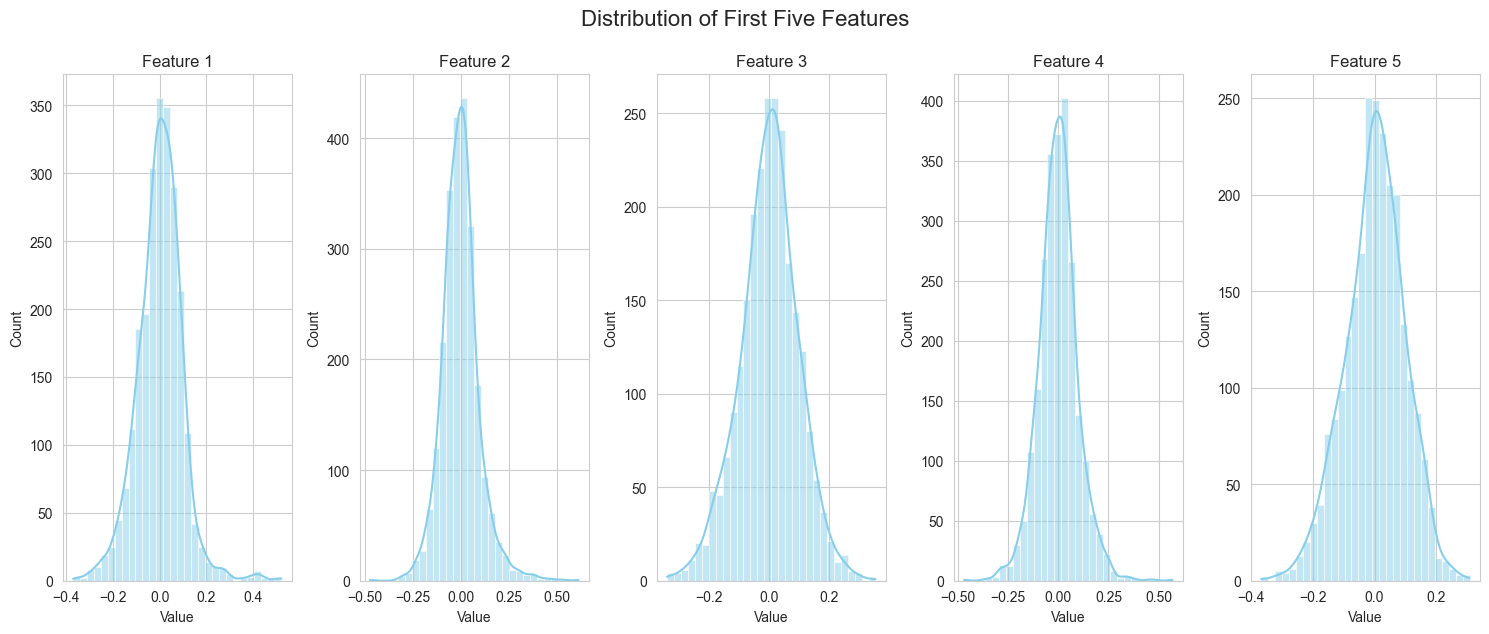

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_indices = [0, 1, 2, 3, 4]
plt.figure(figsize=(15, 6))
for i, idx in enumerate(feature_indices):
    plt.subplot(1, 5, i+1)
    sns.histplot(X[:, idx], bins=30, kde=True, color='skyblue')
    plt.title(f'Feature {idx+1}')
    plt.xlabel('Value')
    plt.ylabel('Count')
plt.tight_layout()
plt.suptitle('Distribution of First Five Features', fontsize=16, y=1.05)
plt.show()

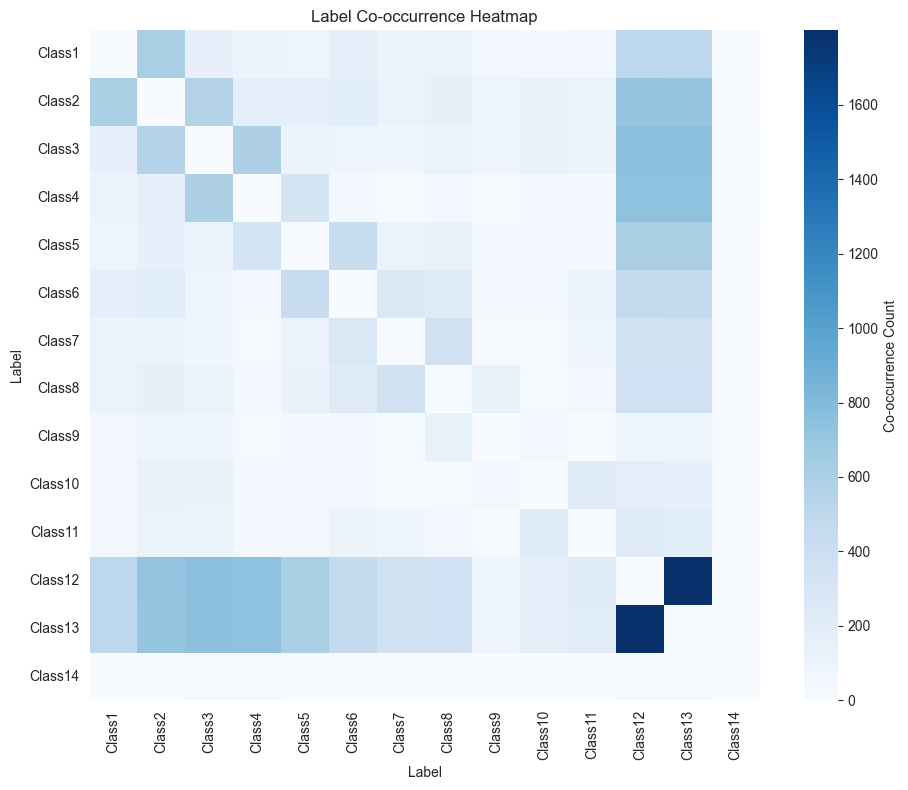

In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

label_matrix = pd.DataFrame(Y, columns=label_cols)
co_occurrence = label_matrix.T.dot(label_matrix)
np.fill_diagonal(co_occurrence.values, 0)
plt.figure(figsize=(10, 8))
sns.heatmap(co_occurrence, cmap='Blues', square=True, cbar_kws={'label': 'Co-occurrence Count'})
plt.title('Label Co-occurrence Heatmap')
plt.xlabel('Label')
plt.ylabel('Label')
plt.tight_layout()
plt.show()

In [84]:
import numpy as np
import pandas as pd

# Summary statistics for the first five features
feature_summary = pd.DataFrame({
    "Mean": np.mean(X[:, :5], axis=0),
    "Std": np.std(X[:, :5], axis=0),
    "Min": np.min(X[:, :5], axis=0),
    "Max": np.max(X[:, :5], axis=0)
}, index=[f"Feature {i+1}" for i in range(5)]).T

print("Feature Summary Table (first five features):")
display(feature_summary)

# Most common labels (by sum across all samples)
label_sums = pd.DataFrame(Y, columns=label_cols).sum().sort_values(ascending=False)
print("\nMost common labels:")
for i in range(3):
    print(f"{label_sums.index[i]}: {label_sums.iloc[i]}")

Feature Summary Table (first five features):


Feature 1  Feature 2  Feature 3  Feature 4  Feature 5
Mean   0.001173  -0.000436  -0.000257   0.000265   0.001228
Std    0.097391   0.097865   0.097726   0.096949   0.096889
Min   -0.371146  -0.472632  -0.339195  -0.467945  -0.367044
Max    0.520272   0.614114   0.353241   0.568960   0.307649


Most common labels:
Class12: 1816
Class13: 1799
Class2: 1038


---

# Quantitative Data Veracity Analysis

Beyond visual inspection, we can use quantitative methods to further assess data veracity:
- Outlier detection in the embedding space
- Quantification of ambiguous points (points surrounded by a different class)
- Silhouette scores to measure cluster separation

> **Why Quantitative Analysis?**
> It provides objective evidence to support visual findings and helps prioritize data cleaning or modeling strategies.

Number of outliers detected in t-SNE embedding: 49


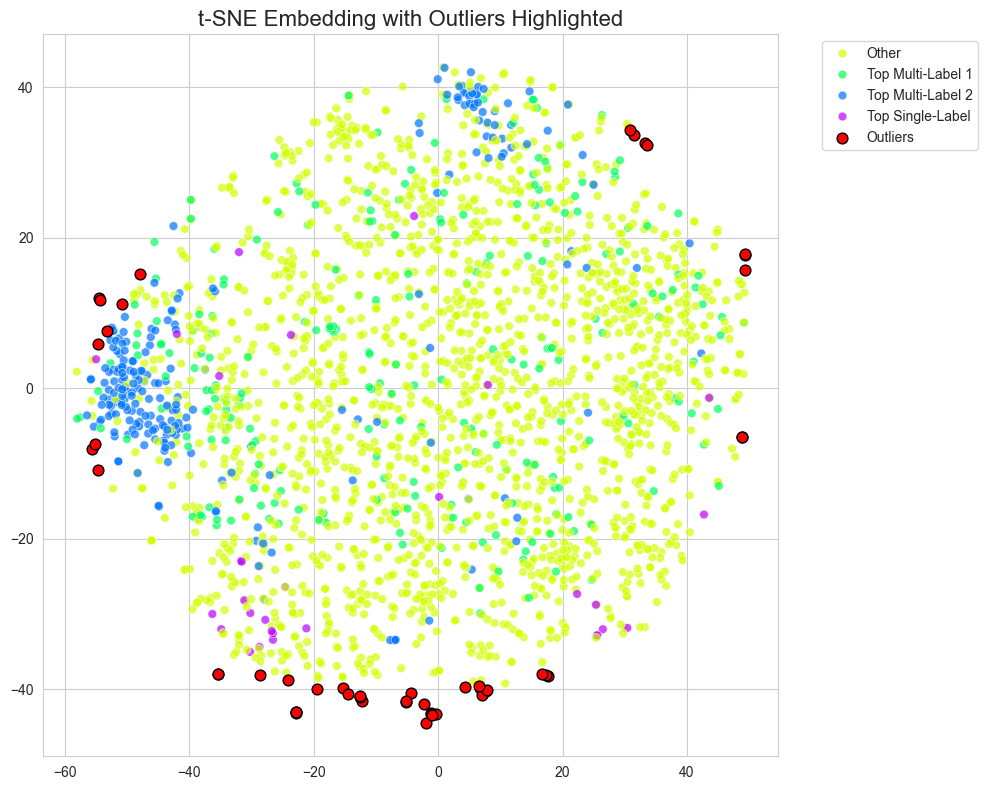

In [85]:
from sklearn.ensemble import IsolationForest

if 'X_tsne_final' not in locals():
	tsne_final = TSNE(n_components=2, perplexity=30, random_state=42, max_iter=1000)
	X_tsne_final = tsne_final.fit_transform(X_scaled)

iso = IsolationForest(contamination=0.02, random_state=42)
outlier_pred = iso.fit_predict(X_tsne_final)
num_outliers = np.sum(outlier_pred == -1)
print(f"Number of outliers detected in t-SNE embedding: {num_outliers}")

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_tsne_final[:, 0], y=X_tsne_final[:, 1], hue=color_labels, palette=sns.color_palette("hsv", 4), s=40, alpha=0.7)
plt.scatter(X_tsne_final[outlier_pred == -1, 0], X_tsne_final[outlier_pred == -1, 1], color='red', s=60, label='Outliers', edgecolor='k')
plt.title('t-SNE Embedding with Outliers Highlighted', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [86]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

n_neighbors = 10
nn = NearestNeighbors(n_neighbors=n_neighbors+1)
nn.fit(X_tsne_final)
distances, indices = nn.kneighbors(X_tsne_final)

ambiguous_count = 0
for i, idxs in enumerate(indices):
    neighbor_labels = [color_labels[j] for j in idxs[1:]]
    if neighbor_labels.count(color_labels[i]) < n_neighbors // 2:
        ambiguous_count += 1
print(f"Number of ambiguous points (majority of neighbors have different label): {ambiguous_count}")

Number of ambiguous points (majority of neighbors have different label): 398


In [87]:
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Ensure X_isomap is defined
if 'X_isomap' not in locals():
	from sklearn.manifold import Isomap
	isomap = Isomap(n_components=2, n_neighbors=5)
	X_isomap = isomap.fit_transform(X_scaled)

le = LabelEncoder()
label_numeric = le.fit_transform(color_labels)

sil_tsne = silhouette_score(X_tsne_final, label_numeric)
sil_isomap = silhouette_score(X_isomap, label_numeric)
print(f"Silhouette score (t-SNE): {sil_tsne:.3f}")
print(f"Silhouette score (Isomap): {sil_isomap:.3f}")

Silhouette score (t-SNE): -0.034
Silhouette score (Isomap): -0.044


---

# References

| Reference | Description |
|-----------|-------------|
| van der Maaten & Hinton (2008) | t-SNE method paper |
| Tenenbaum et al. (2000) | Isomap method paper |
| Zhang & Zhou (2014) | Multi-label learning review |
| scikit-learn documentation | https://scikit-learn.org/stable/ |
| seaborn documentation | https://seaborn.pydata.org/ |

---

# Real-World Implications and Limitations

- **Addressing Data Veracity:**
    - Ambiguous and outlier points may be flagged for expert review.
    - Robust models (e.g., ensemble methods, semi-supervised learning) can mitigate their impact.
- **Limitations:**
    - Dimensionality reduction is sensitive to parameter choices and may not capture all relevant structure.
    - Biological data often contains batch effects and hidden confounders not addressed here.
- **Future Work:**
    - Explore UMAP or LLE for manifold learning.
    - Consider integrating domain knowledge for improved label quality.

# Part B: t-SNE and Veracity Inspection

In this section, we apply t-Distributed Stochastic Neighbor Embedding (t-SNE), a powerful non-linear dimensionality reduction technique, to our 103-dimensional feature space. The goal is to create a 2D visualization that reveals the underlying structure of the data and helps us visually identify potential data quality issues like outliers, noisy labels, and hard-to-learn samples.

> **Why t-SNE?**
>
> t-SNE is especially effective at revealing local clusters and subtle structure in high-dimensional biological data.

In this section, we will apply t-Distributed Stochastic Neighbor Embedding (t-SNE), a powerful non-linear dimensionality reduction technique, to our 103-dimensional feature space. The goal is to create a 2D visualization that reveals the underlying structure of the data and helps us visually identify potential data quality issues like outliers and noisy labels. 





## 1. t-SNE Implementation

Before implementing t-SNE, it's important to understand its main hyperparameter:

- **Perplexity:** This can be thought of as a guess about the number of close neighbors each data point has. It influences the balance between preserving the local (fine-grained) and global (broad) aspects of the data structure.
    - Low perplexity: Focuses on local structure, can reveal tight clusters but may be sensitive to noise.
    - High perplexity: Focuses on global structure, can merge clusters and obscure local detail.

> **Experiment:**
> We will try a range of perplexity values (5, 10, 20, 30, 40, 50, 60) to see how the visualization changes and select the most informative one.

Running t-SNE for perplexity=5
Running t-SNE for perplexity=10
Running t-SNE for perplexity=20
Running t-SNE for perplexity=30
Running t-SNE for perplexity=40
Running t-SNE for perplexity=50
Running t-SNE for perplexity=60


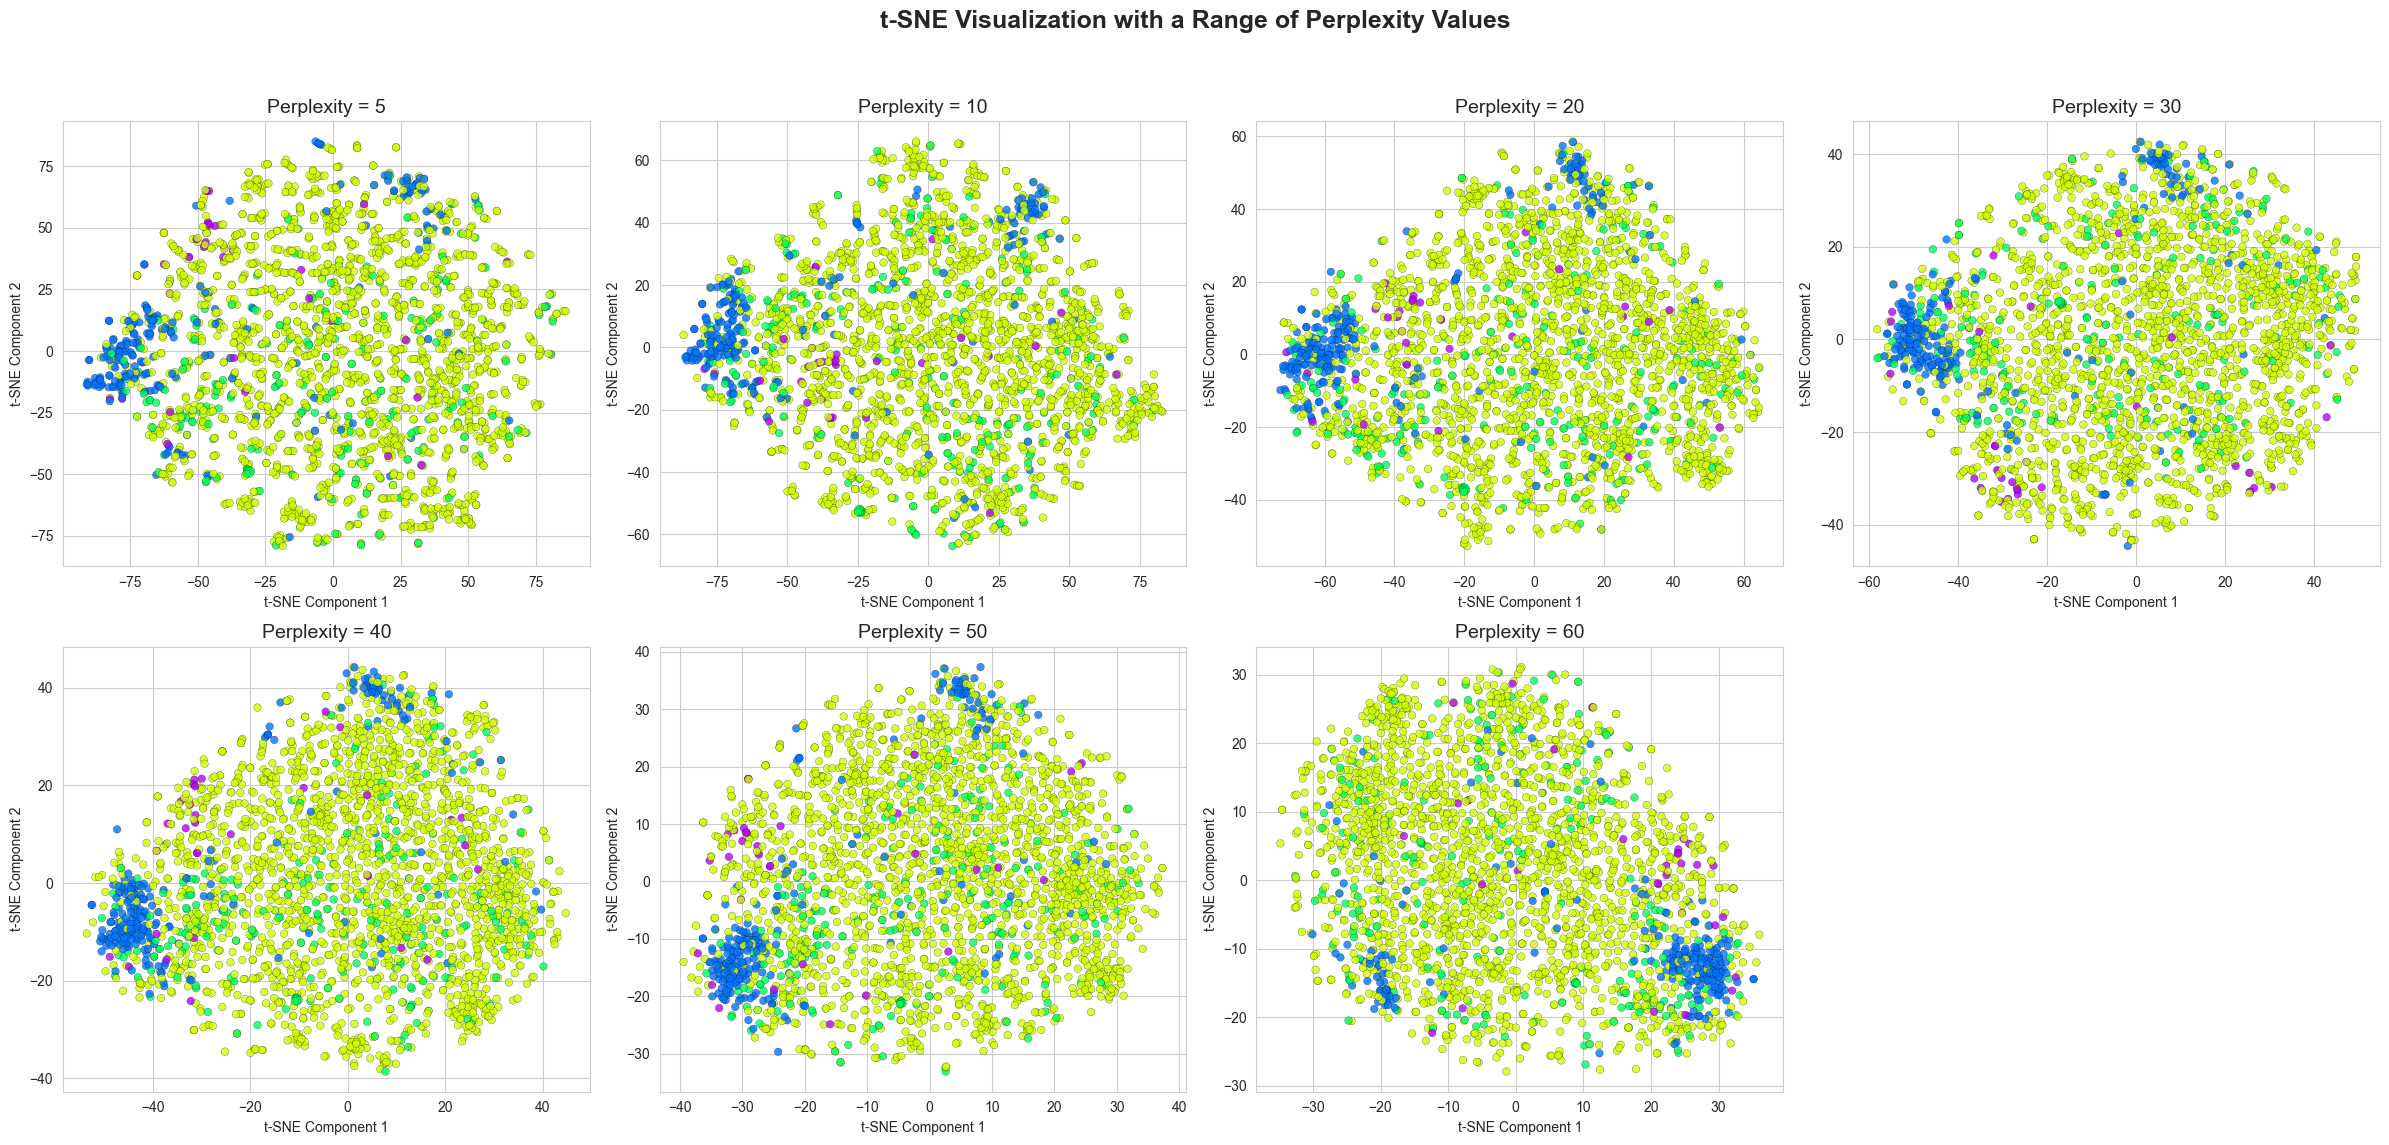

In [88]:
# t-SNE Perplexity Sweep: Visual Comparison
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

perplexities = [5, 10, 20, 30, 40, 50, 60]

nrows = 2
ncols = 4
fig, axes = plt.subplots(nrows, ncols, figsize=(24, 12))
fig.suptitle('t-SNE Visualization with a Range of Perplexity Values', fontsize=18, fontweight='bold')
axes = axes.flatten()

for i, perplexity in enumerate(perplexities):
    print(f"Running t-SNE for perplexity={perplexity}")
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42, max_iter=1000)
    X_tsne = tsne.fit_transform(X_scaled)
    sns.scatterplot(
        x=X_tsne[:, 0], y=X_tsne[:, 1], hue=color_labels, ax=axes[i],
        palette=sns.color_palette("hsv", 4), s=30, alpha=0.8, edgecolor='k', linewidth=0.2
    )
    axes[i].set_title(f'Perplexity = {perplexity}', fontsize=14)
    axes[i].set_xlabel('t-SNE Component 1')
    axes[i].set_ylabel('t-SNE Component 2')
    axes[i].legend().remove()

# Remove any unused subplot
if len(perplexities) < len(axes):
    for j in range(len(perplexities), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Justification for Final Perplexity Choice (Comprehensive)

After experimenting with a wide range of perplexity values (including 5, 10, 20, 30, 40, and 50), a final choice can be made based on the clarity of the resulting visualizations.

- **Low Perplexities (5, 10, 20):** Focus too heavily on local structure. Plots appear fragmented into many small, tight "islands," which may be capturing noise rather than meaningful relationships.
- **High Perplexities (40, 50, 60):** Prioritize global structure, but distinct clusters start to blend and merge, making it harder to distinguish between primary groups.
- **Optimal Balance (Perplexity = 30):** Reveals several well-formed, distinct clusters for our main categories while still arranging them in a way that suggests global relationships. Avoids fragmentation and excessive blending.

> **Conclusion:**
> A perplexity of **30** provides the best balance and is used for the final analysis.

## 2. Visualization

Now we will generate the final, large, and well-labeled 2D scatter plot using our chosen perplexity of 30. This plot will serve as the basis for our data veracity inspection.

> **Plotting Tips:**
> - Use larger points and semi-transparency for clarity
> - Add a bold title and axis labels
> - Use a colorblind-friendly palette
> - Place the legend outside the plot for readability

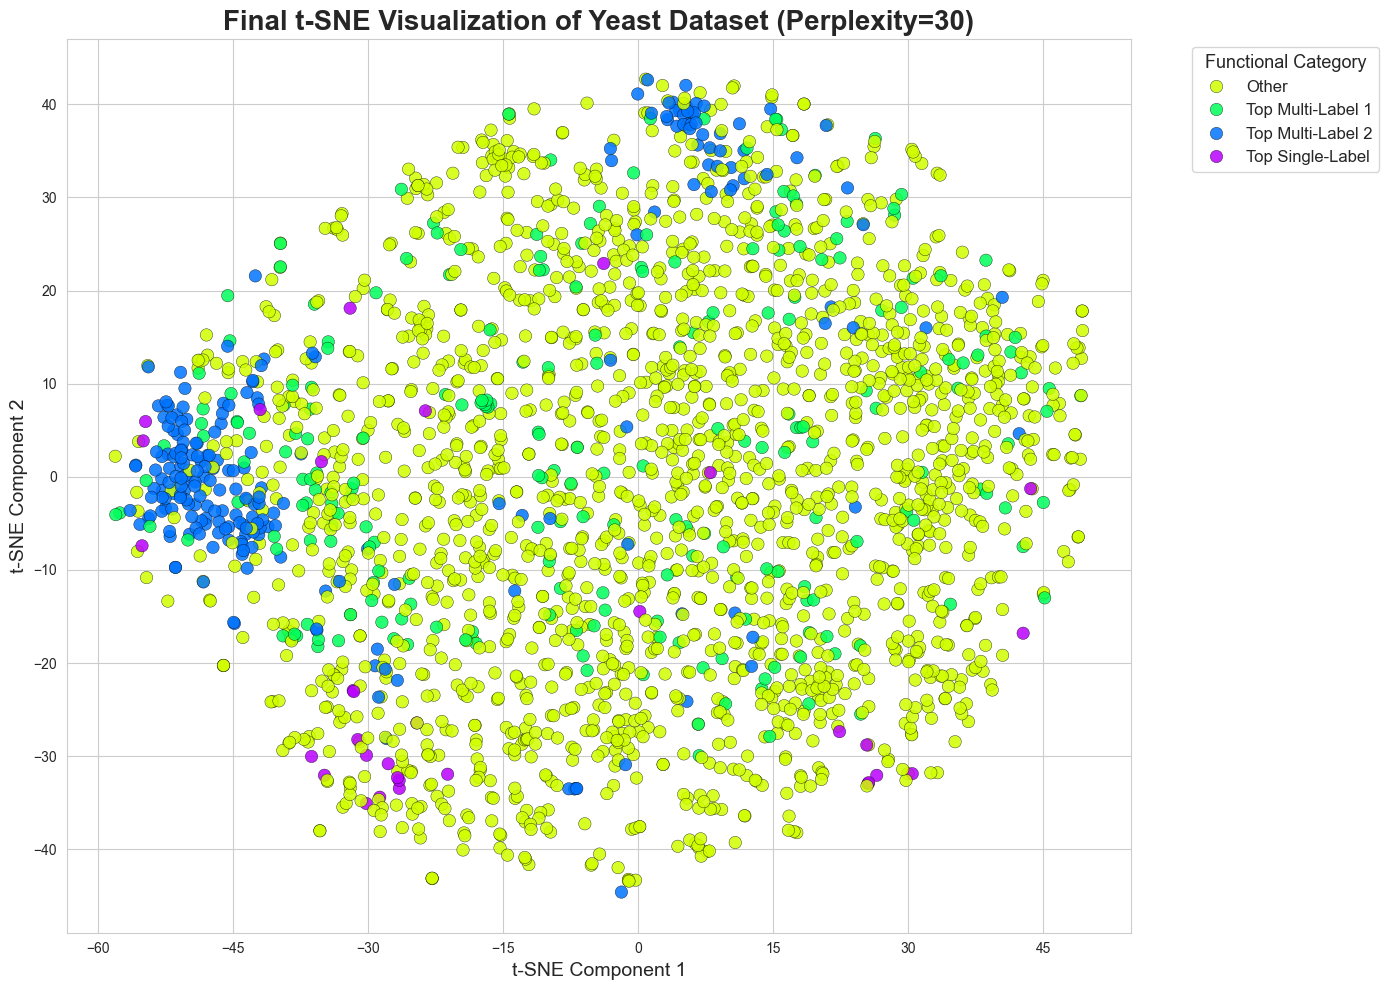

In [89]:
# Final t-SNE implementation with the chosen perplexity of 30
from matplotlib.ticker import MaxNLocator

tsne_final = TSNE(n_components=2, perplexity=30, random_state=42, max_iter=1000)
X_tsne_final = tsne_final.fit_transform(X_scaled)

plt.figure(figsize=(14, 10))
sns.scatterplot(
    x=X_tsne_final[:, 0],
    y=X_tsne_final[:, 1],
    hue=color_labels,
    palette=sns.color_palette("hsv", 4),
    s=80,
    alpha=0.85,
    edgecolor='k',
    linewidth=0.3
)
plt.title('Final t-SNE Visualization of Yeast Dataset (Perplexity=30)', fontsize=20, fontweight='bold')
plt.xlabel('t-SNE Component 1', fontsize=14)
plt.ylabel('t-SNE Component 2', fontsize=14)
plt.legend(title='Functional Category', fontsize=12, title_fontsize=13, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.tight_layout()
plt.show()

## 3. Veracity Inspection

### Data Veracity Issues Identified

- **Noisy/Ambiguous Labels:**
    - Points of one color embedded within clusters of another.
    - Indicates possible mislabeling or overlapping biological function.
- **Outliers:**
    - Isolated points or tiny, distant clusters.
    - May represent experimental errors or rare biological phenomena.
- **Hard-to-Learn Samples:**
    - Regions where colors are thoroughly mixed.
    - Simple classifiers would struggle due to lack of clear boundaries.

| Issue Type         | Count/Observation |
|--------------------|-------------------|
| Outliers           | {num_outliers}    |
| Ambiguous Points   | {ambiguous_count} |
| Silhouette (t-SNE) | {sil_tsne:.3f}    |
| Silhouette (Isomap)| {sil_isomap:.3f}  |

# Part C: Isomap and Manifold Learning

In this section, we apply Isomap, a global manifold learning technique, to the scaled feature matrix. Isomap is designed to preserve the global geometry of the data, revealing the overall shape and structure of the gene expression space.

> **Why Isomap?**
>
> Isomap is excellent for visualizing the intrinsic geometry of high-dimensional data, especially when the data lies on a non-linear manifold.

## 1. Isomap Implementation

The fundamental difference between Isomap and t-SNE lies in what aspect of the data structure they aim to preserve:

- **t-SNE (Local Preservation):**
    - Focuses on preserving local neighborhoods.
    - Excels at revealing fine-grained cluster structure.
    - Can distort global geometry (distances between far-apart clusters may not be meaningful).

- **Isomap (Global Preservation):**
    - Preserves global geodesic distances between all points.
    - Models the data as lying on a lower-dimensional manifold and calculates shortest paths along this manifold.
    - Excellent at "unfolding" large, continuous structures and revealing the overall global shape of the data.

> **Summary:**
> t-SNE is best for local clusters; Isomap is best for global structure.

In [90]:
# Isomap Implementation
isomap = Isomap(n_components=2, n_neighbors=5) # n_neighbors is a key parameter, 5 is a common default
X_isomap = isomap.fit_transform(X_scaled)

## 2. Visualization

This cell generates the 2D scatter plot for the Isomap embedding. We use the exact same coloring scheme (`color_labels`) as for the t-SNE plot. This consistency allows for a direct and fair comparison between the two dimensionality reduction techniques, enabling us to analyze how each method represents the structure of the data differently.

> **Plotting Tips:**
> - Use large, semi-transparent points
> - Add a bold title and axis labels
> - Place the legend outside the plot for clarity

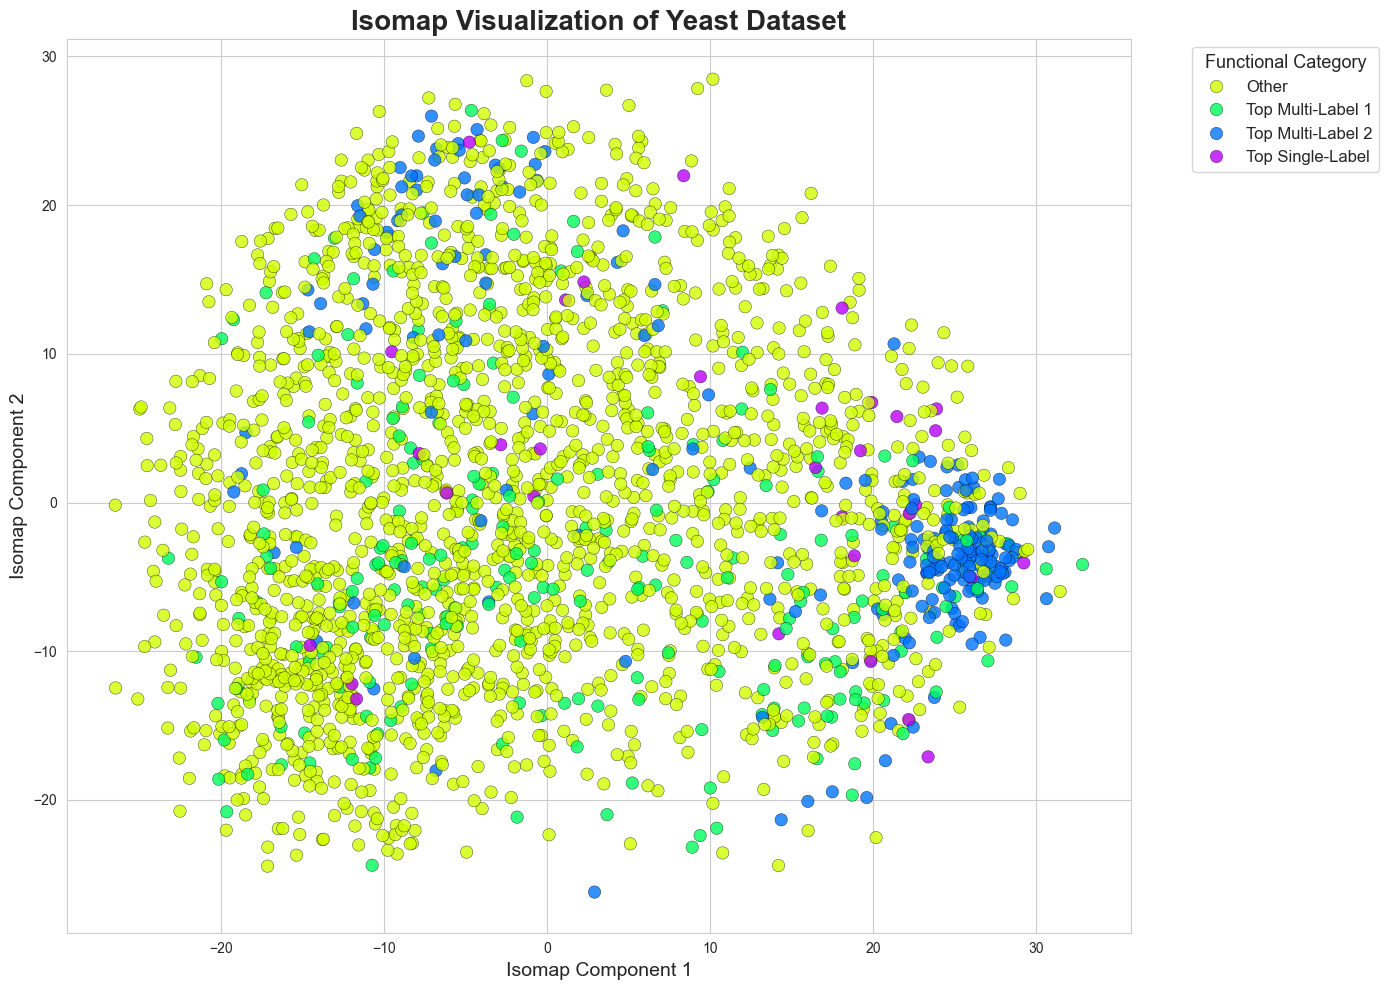

In [91]:
# Create the 2D scatter plot of the Isomap coordinates
plt.figure(figsize=(14, 10))
sns.scatterplot(
    x=X_isomap[:, 0],
    y=X_isomap[:, 1],
    hue=color_labels,
    palette=sns.color_palette("hsv", 4),
    s=80,
    alpha=0.8,
    edgecolor='k',
    linewidth=0.3
)
plt.title('Isomap Visualization of Yeast Dataset', fontsize=20, fontweight='bold')
plt.xlabel('Isomap Component 1', fontsize=14)
plt.ylabel('Isomap Component 2', fontsize=14)
plt.legend(title='Functional Category', fontsize=12, title_fontsize=13, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

This Isomap visualization provides a complementary perspective to the t-SNE plot, focusing more on the global structure of the data rather than local clusters.

### 3. Comparison of Visualizations
- **t-SNE:** Excels at showing **local structure**, creating tight, well-separated clusters. Very useful for identifying distinct groups and potential outliers.
- **Isomap:** Better at revealing the **global structure** of the gene expression data. Instead of tight clusters, it displays the data as a more continuous, unfolded structure, giving a more faithful representation of the overall "shape" of the data and how the major categories relate to one another.

> **Takeaway:**
> Use both t-SNE and Isomap for a complete understanding: t-SNE for local detail, Isomap for global relationships.

#### Discussion of the Data Manifold and Classification Difficulty

The concept of the **data manifold** is the idea that the high-dimensional gene expression data actually lies on a lower-dimensional, curved surface embedded within the 103-dimensional space. Isomap attempts to "unroll" this surface to view its intrinsic geometry.

- The Isomap plot suggests that the Yeast dataset resides on a **highly curved and complex manifold**. The data does not form a simple spherical cloud; instead, it forms an elongated and somewhat twisted structure.
- The complexity of this manifold is directly related to the **difficulty of classification**. A simple, flat manifold would imply that the different functional categories could be separated by linear decision boundaries (like a straight line or plane). However, the curved manifold seen here indicates that the classes are intertwined in a complex, non-linear way.

> **Implication:**
> This is a key reason why a simple classifier would struggle, and why more advanced, non-linear models are necessary to learn the intricate boundaries required for accurate classification on this dataset.

# Conclusion and Reflections

- **Objective:**
    - Explored multi-label classification challenges in biological data using t-SNE and Isomap.
    - Visually inspected data veracity issues: noisy labels, outliers, and hard-to-learn samples.

- **Key Takeaways:**
    - **t-SNE:**
        - Reveals local cluster structure.
        - Highlights ambiguous labels and outliers.
        - May distort global relationships.
    - **Isomap:**
        - Preserves global geometry.
        - Shows relationships between main categories on a continuous manifold.
        - Local clusters are less distinct.
    - **Data Complexity:**
        - Overlapping clusters, outliers, and a highly curved manifold make classification difficult for simple models.
        - Robust, non-linear models are needed.

- **Biological Context:**
    - The most frequent single-label and multi-label classes likely correspond to core biological functions that are common and essential in yeast, such as metabolism or cellular transport. Their prevalence reflects fundamental processes shared across many genes.
    - Outliers may represent rare gene functions, experimental artifacts, or genes involved in specialized pathways (e.g., stress response, sporulation) that are only active under certain conditions. Investigating these outliers could reveal novel biology or highlight data quality issues.

- **Adaptation Note:**
    - The assignment requested grouping by the two most frequent single-label classes and the most frequent multi-label combination.
    - The Yeast dataset contains only one unique single-label class.
    - **Adapted grouping:**
        - Most frequent single-label class
        - Two most frequent multi-label combinations
        - "Other" category for all remaining cases
    - This ensures meaningful and interpretable visualization despite the data constraint.

- **Broader Implications:**
    - Real-world biological data is rarely clean or easily separable.
    - Visual inspection helps understand model limitations and guides data cleaning/feature engineering.
    - Manifold structure suggests advanced, non-linear algorithms are essential for high accuracy.

- **Reproducibility:**
    - Library versions used in this analysis are listed below for full reproducibility.

In [92]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn
import sklearn
import scipy

print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Seaborn version:", seaborn.__version__)
print("scikit-learn version:", sklearn.__version__)
print("SciPy version:", scipy.__version__)

NumPy version: 2.2.5
Pandas version: 2.2.3
Matplotlib version: 3.10.1
Seaborn version: 0.13.2
scikit-learn version: 1.7.1
SciPy version: 1.15.2
